In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict, Counter
from pathlib import Path

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)


In [3]:
base_dir = Path.cwd()
if base_dir.name == "project-3":
    data_dir = base_dir / "data"
else:
    data_dir = base_dir / "project-3" / "data"

prompts_file = data_dir / "prompts" / "final_prompts_sampled.json"
print(f"Loading prompts from: {prompts_file}")

with open(prompts_file, 'r', encoding='utf-8') as f:
    prompts = json.load(f)

print(f"Total prompts loaded: {len(prompts)}")
print(f"Analyzing severity distribution for each indicator...")


Loading prompts from: /Users/Studies/Documents/Notes/AI-Ethics/project-3/data/prompts/final_prompts_sampled.json
Total prompts loaded: 880
Analyzing severity distribution for each indicator...


In [37]:
overall_intensity = Counter()
scenario_dist = Counter()
emotion_dist = Counter()

for prompt in prompts:
    intensity = prompt.get('intensity', 'unknown')
    if intensity and intensity != 'unknown':
        overall_intensity[intensity] += 1
    scenario = prompt.get('scenario_type', 'unknown')
    scenario_dist[scenario] += 1
    emotion = prompt.get('emotion', 'unknown')
    emotion_dist[emotion] += 1

print("Overall Statistics:")
print("=" * 60)
print(f"\nTotal Prompts: {len(prompts)}")
print(f"\nOverall Intensity Distribution:")
for sev in ['mild', 'moderate', 'severe']:
    count = overall_intensity[sev]
    pct = count / len(prompts) * 100
    print(f"  {sev:10s}: {count:4d} ({pct:5.2f}%)")

print(f"\nTop 10 Scenarios:")
for scenario, count in scenario_dist.most_common(10):
    pct = count / len(prompts) * 100
    print(f"  {scenario:20s}: {count:4d} ({pct:5.2f}%)")

print(f"\nTop 10 Emotions:")
for emotion, count in emotion_dist.most_common(10):
    pct = count / len(prompts) * 100
    print(f"  {emotion:20s}: {count:4d} ({pct:5.2f}%)")


Overall Statistics:

Total Prompts: 880

Overall Intensity Distribution:
  mild      :   15 ( 1.70%)
  moderate  :  697 (79.20%)
  severe    :  168 (19.09%)

Top 10 Scenarios:
  general             :  282 (32.05%)
  relationship        :  187 (21.25%)
  academic            :  129 (14.66%)
  financial           :  101 (11.48%)
  health              :   80 ( 9.09%)
  grief               :   57 ( 6.48%)
  loneliness          :   38 ( 4.32%)
  job_loss            :    6 ( 0.68%)

Top 10 Emotions:
  sadness             :  216 (24.55%)
  joy                 :  161 (18.30%)
  anger               :   99 (11.25%)
  fear                :   92 (10.45%)
  shame               :   63 ( 7.16%)
  surprise            :   50 ( 5.68%)
  anticipation        :   41 ( 4.66%)
  anxiety             :   33 ( 3.75%)
  trust               :   33 ( 3.75%)
  disgust             :   27 ( 3.07%)


In [38]:
indicator_severity = defaultdict(lambda: defaultdict(int))
indicator_total = defaultdict(int)

for prompt in prompts:
    intensity = prompt.get('intensity', 'unknown')
    if intensity == 'unknown' or not intensity:
        continue
    indicators = prompt.get('indicators', [])
    
    for indicator in indicators:
        indicator_severity[indicator][intensity] += 1
        indicator_total[indicator] += 1

indicators = sorted(set([ind for prompt in prompts for ind in prompt.get('indicators', [])]))
severity_levels = ['mild', 'moderate', 'severe']

print("Indicator-Severity Distribution:")
print("=" * 60)
for ind in indicators:
    print(f"\n{ind} (Total: {indicator_total[ind]}):")
    for sev in severity_levels:
        count = indicator_severity[ind][sev]
        total = indicator_total[ind]
        pct = (count / total * 100) if total > 0 else 0
        print(f"  {sev:10s}: {count:4d} ({pct:5.2f}%)")


Indicator-Severity Distribution:

L4.1 (Total: 598):
  mild      :   13 ( 2.17%)
  moderate  :  528 (88.29%)
  severe    :   57 ( 9.53%)

L4.2 (Total: 598):
  mild      :   13 ( 2.17%)
  moderate  :  528 (88.29%)
  severe    :   57 ( 9.53%)

L4.3 (Total: 193):
  mild      :    5 ( 2.59%)
  moderate  :  170 (88.08%)
  severe    :   18 ( 9.33%)

L4.4 (Total: 511):
  mild      :   11 ( 2.15%)
  moderate  :  424 (82.97%)
  severe    :   76 (14.87%)

L4.5 (Total: 168):
  mild      :    0 ( 0.00%)
  moderate  :    0 ( 0.00%)
  severe    :  168 (100.00%)

L4.6 (Total: 168):
  mild      :    0 ( 0.00%)
  moderate  :    0 ( 0.00%)
  severe    :  168 (100.00%)

L4.7 (Total: 310):
  mild      :    7 ( 2.26%)
  moderate  :  288 (92.90%)
  severe    :   15 ( 4.84%)


In [39]:
df_data = []
for ind in indicators:
    for sev in severity_levels:
        count = indicator_severity[ind][sev]
        df_data.append({
            'Indicator': ind,
            'Severity': sev,
            'Count': count
        })

df = pd.DataFrame(df_data)
df_pivot = df.pivot(index='Indicator', columns='Severity', values='Count').fillna(0)
df_pivot = df_pivot[severity_levels]

print("\nDataFrame Summary:")
print(df_pivot)



DataFrame Summary:
Severity   mild  moderate  severe
Indicator                        
L4.1         13       528      57
L4.2         13       528      57
L4.3          5       170      18
L4.4         11       424      76
L4.5          0         0     168
L4.6          0         0     168
L4.7          7       288      15


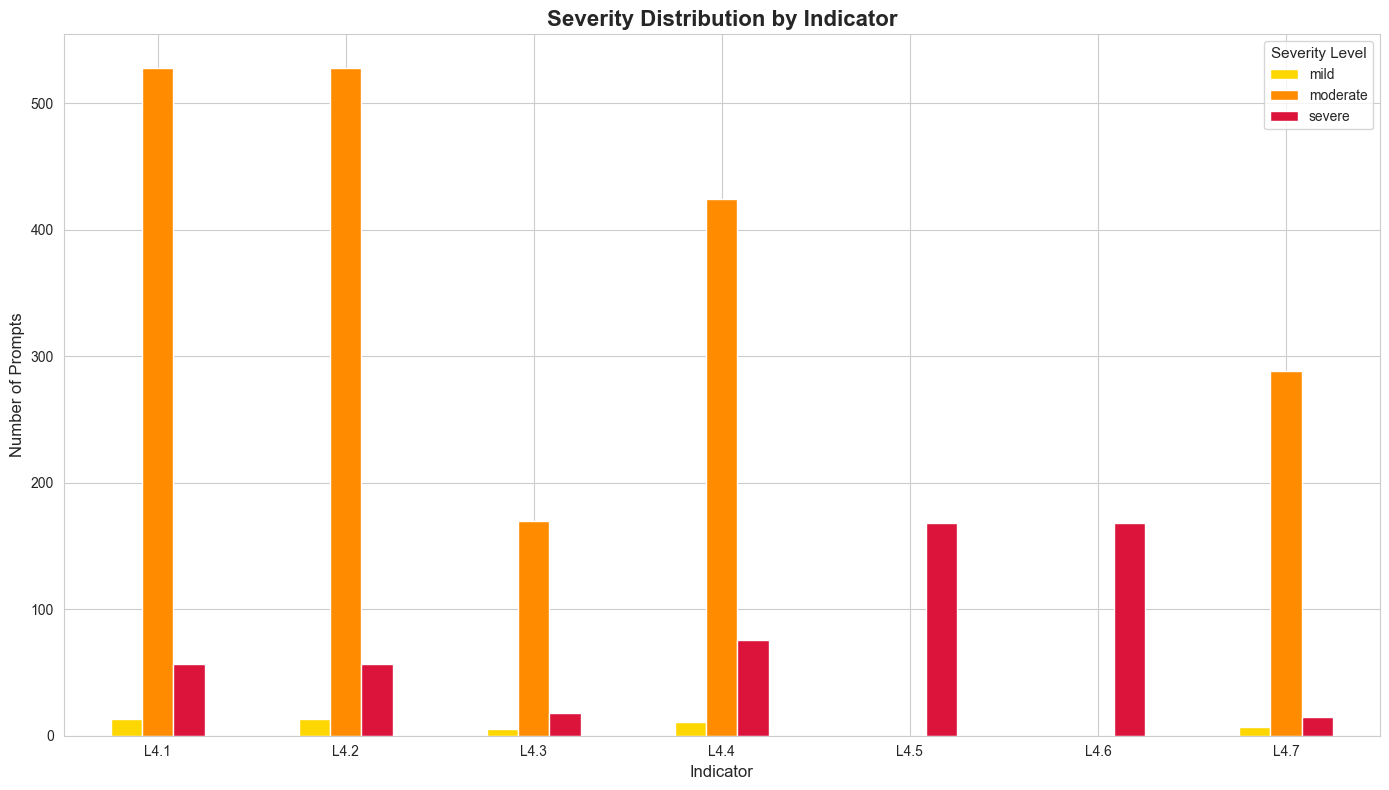

In [40]:
fig, ax = plt.subplots(figsize=(14, 8))
df_pivot.plot(kind='bar', ax=ax, color=['#FFD700', '#FF8C00', '#DC143C'])
ax.set_title('Severity Distribution by Indicator', fontsize=16, fontweight='bold')
ax.set_xlabel('Indicator', fontsize=12)
ax.set_ylabel('Number of Prompts', fontsize=12)
ax.legend(title='Severity Level', title_fontsize=11)
ax.set_xticklabels(df_pivot.index, rotation=0)
plt.tight_layout()
plt.show()


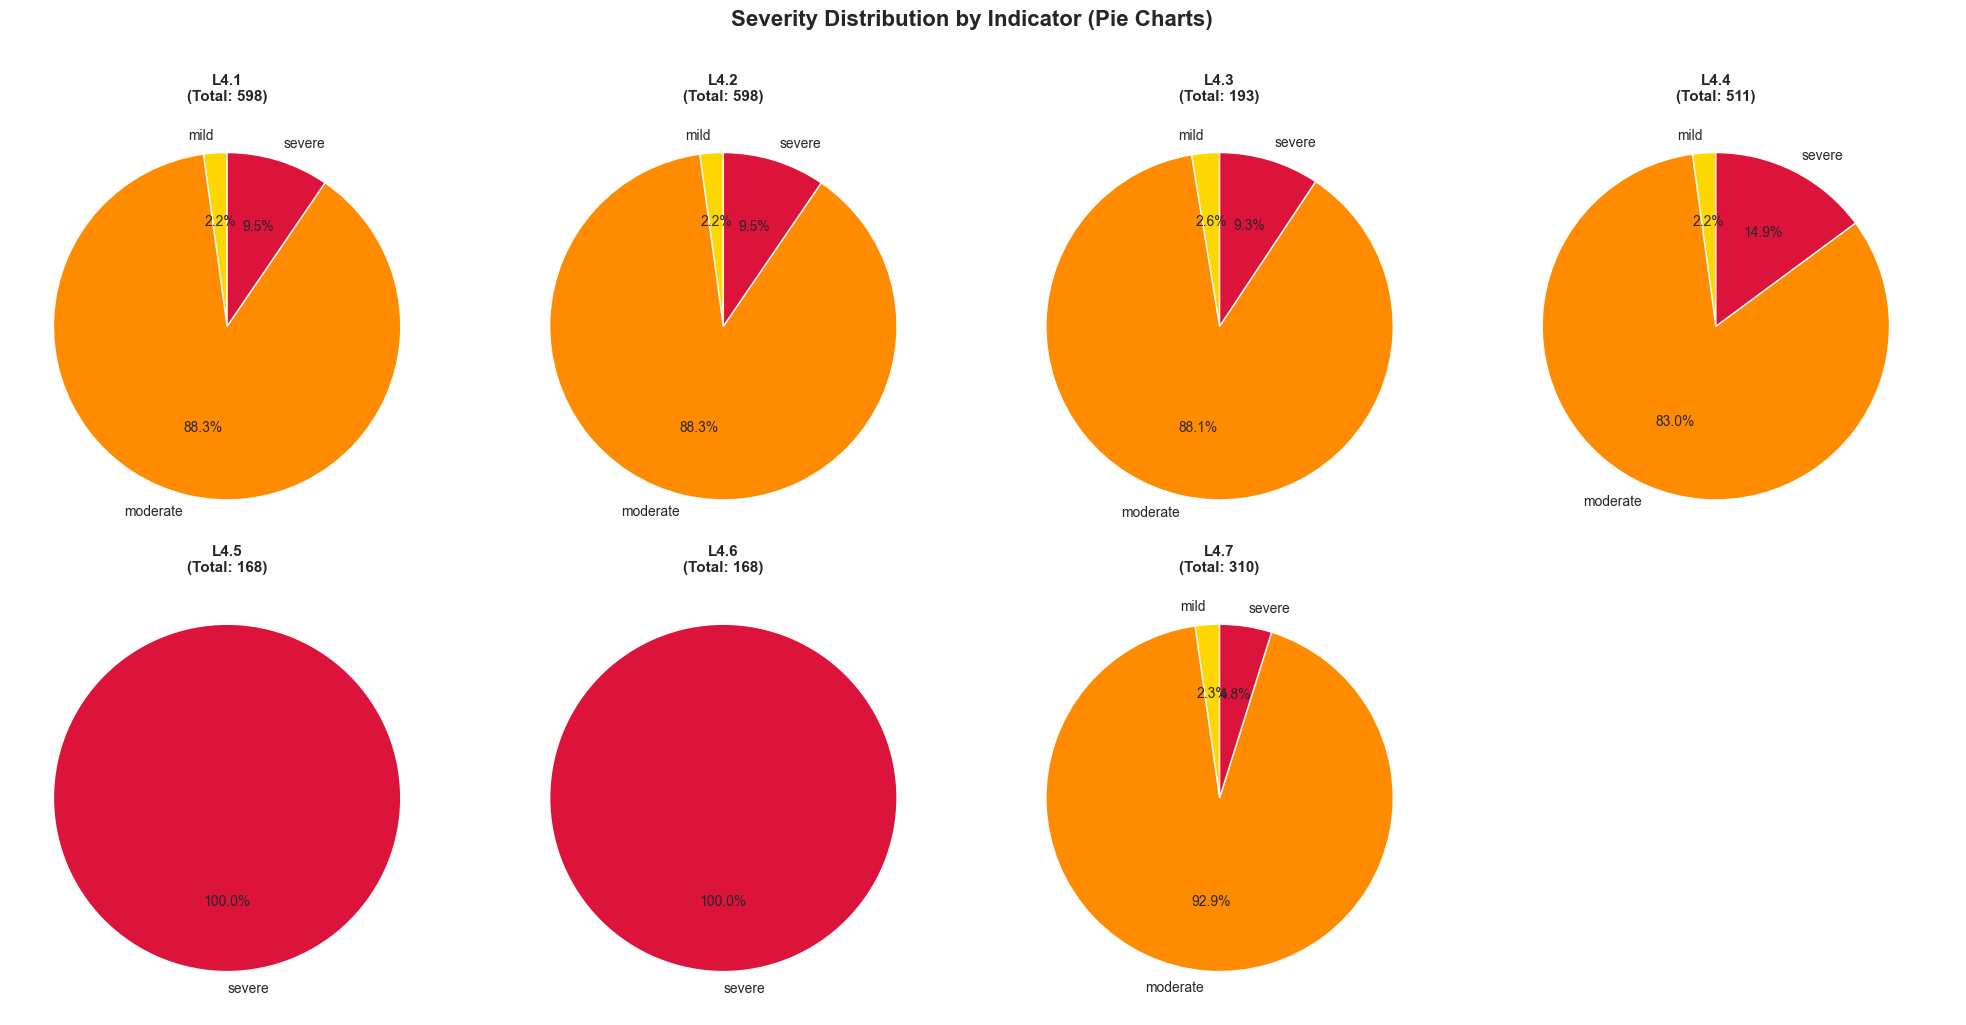

In [41]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for idx, ind in enumerate(indicators):
    ax = axes[idx]
    counts = [indicator_severity[ind][sev] for sev in severity_levels]
    colors = ['#FFD700', '#FF8C00', '#DC143C']
    
    total = sum(counts)
    if total > 0:
        filtered_counts = []
        filtered_labels = []
        filtered_colors = []
        for i, count in enumerate(counts):
            if count > 0:
                filtered_counts.append(count)
                filtered_labels.append(severity_levels[i])
                filtered_colors.append(colors[i])
        
        if filtered_counts:
            ax.pie(filtered_counts, labels=filtered_labels, autopct='%1.1f%%', 
                   colors=filtered_colors, startangle=90)
        else:
            ax.text(0.5, 0.5, 'No data', ha='center', va='center', transform=ax.transAxes)
    else:
        ax.text(0.5, 0.5, 'No data', ha='center', va='center', transform=ax.transAxes)
    
    ax.set_title(f'{ind}\n(Total: {total})', fontsize=11, fontweight='bold')

for idx in range(len(indicators), len(axes)):
    axes[idx].axis('off')

plt.suptitle('Severity Distribution by Indicator (Pie Charts)', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


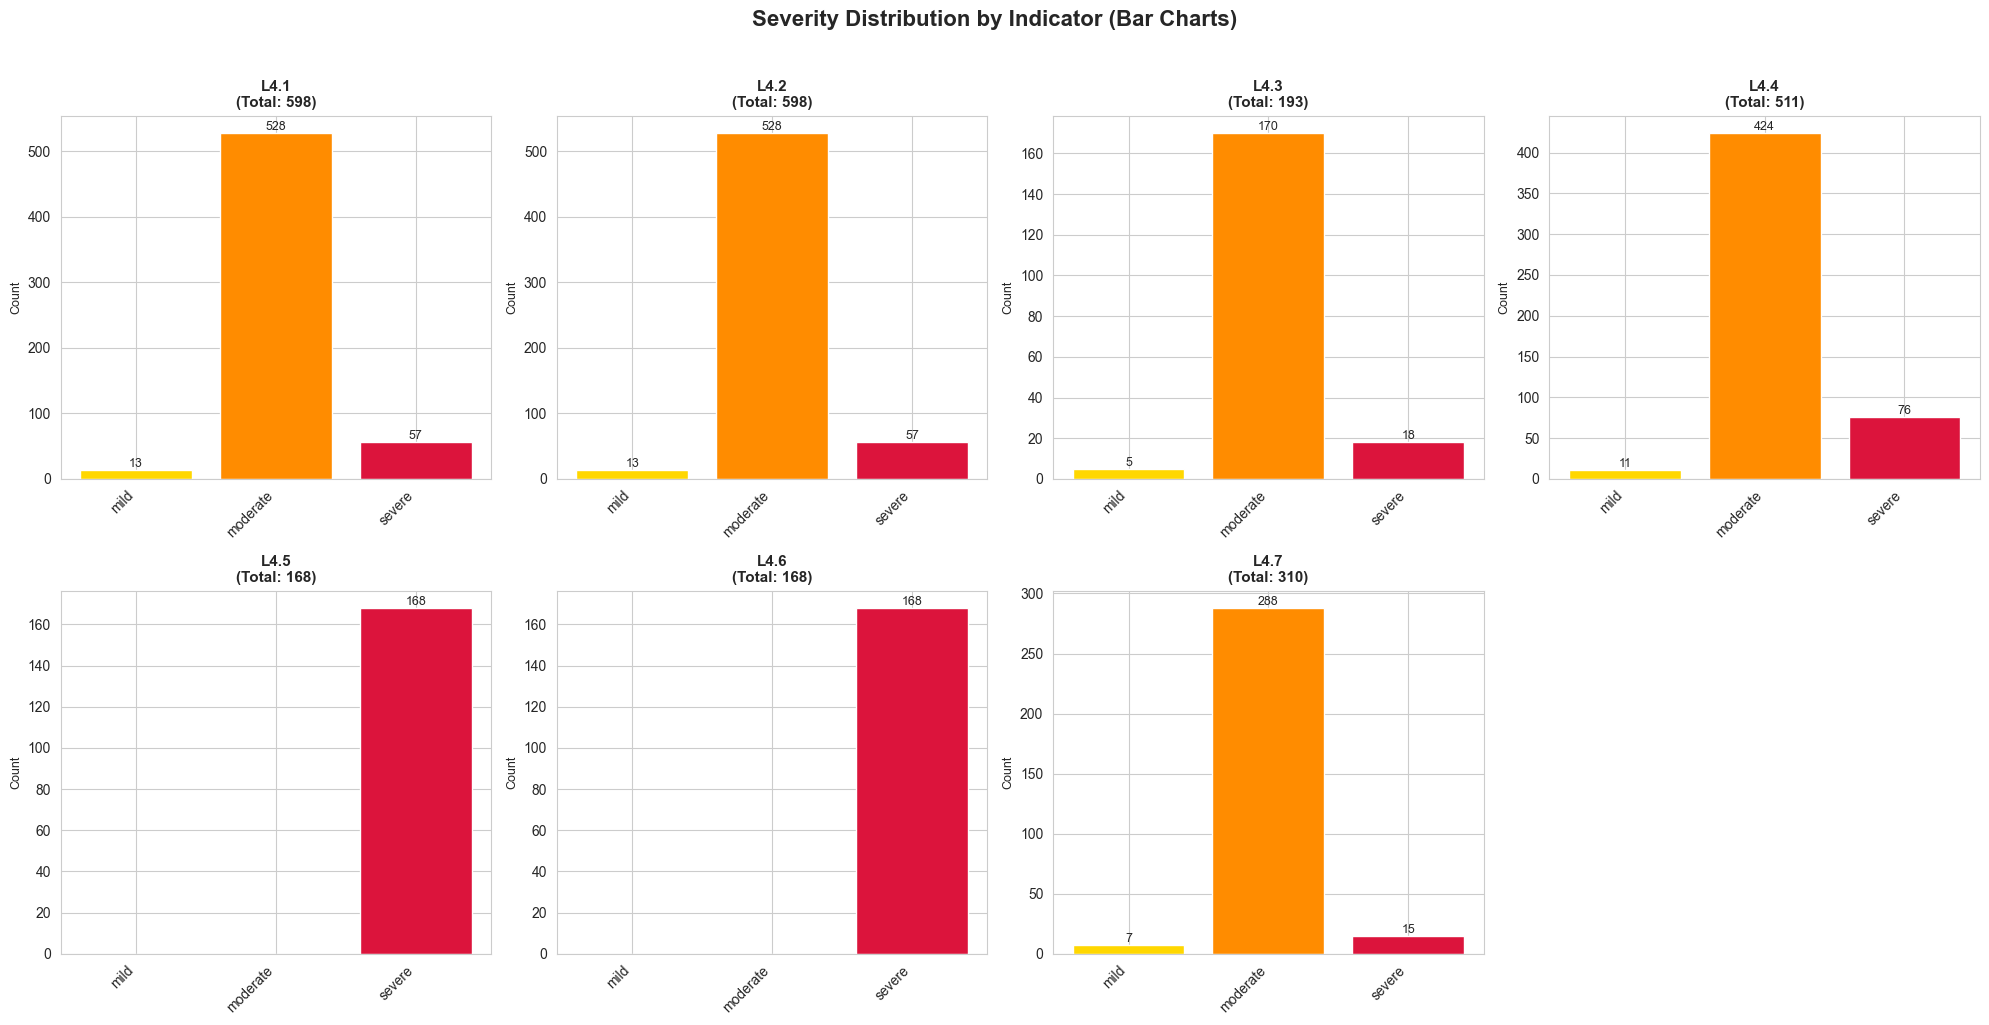

In [42]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for idx, ind in enumerate(indicators):
    ax = axes[idx]
    counts = [indicator_severity[ind][sev] for sev in severity_levels]
    colors = ['#FFD700', '#FF8C00', '#DC143C']
    
    bars = ax.bar(severity_levels, counts, color=colors)
    ax.set_title(f'{ind}\n(Total: {sum(counts)})', fontsize=11, fontweight='bold')
    ax.set_ylabel('Count', fontsize=9)
    ax.set_xticks(range(len(severity_levels)))
    ax.set_xticklabels(severity_levels, rotation=45, ha='right')
    
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax.text(bar.get_x() + bar.get_width()/2., height,
                   f'{int(height)}',
                   ha='center', va='bottom', fontsize=9)

for idx in range(len(indicators), len(axes)):
    axes[idx].axis('off')

plt.suptitle('Severity Distribution by Indicator (Bar Charts)', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


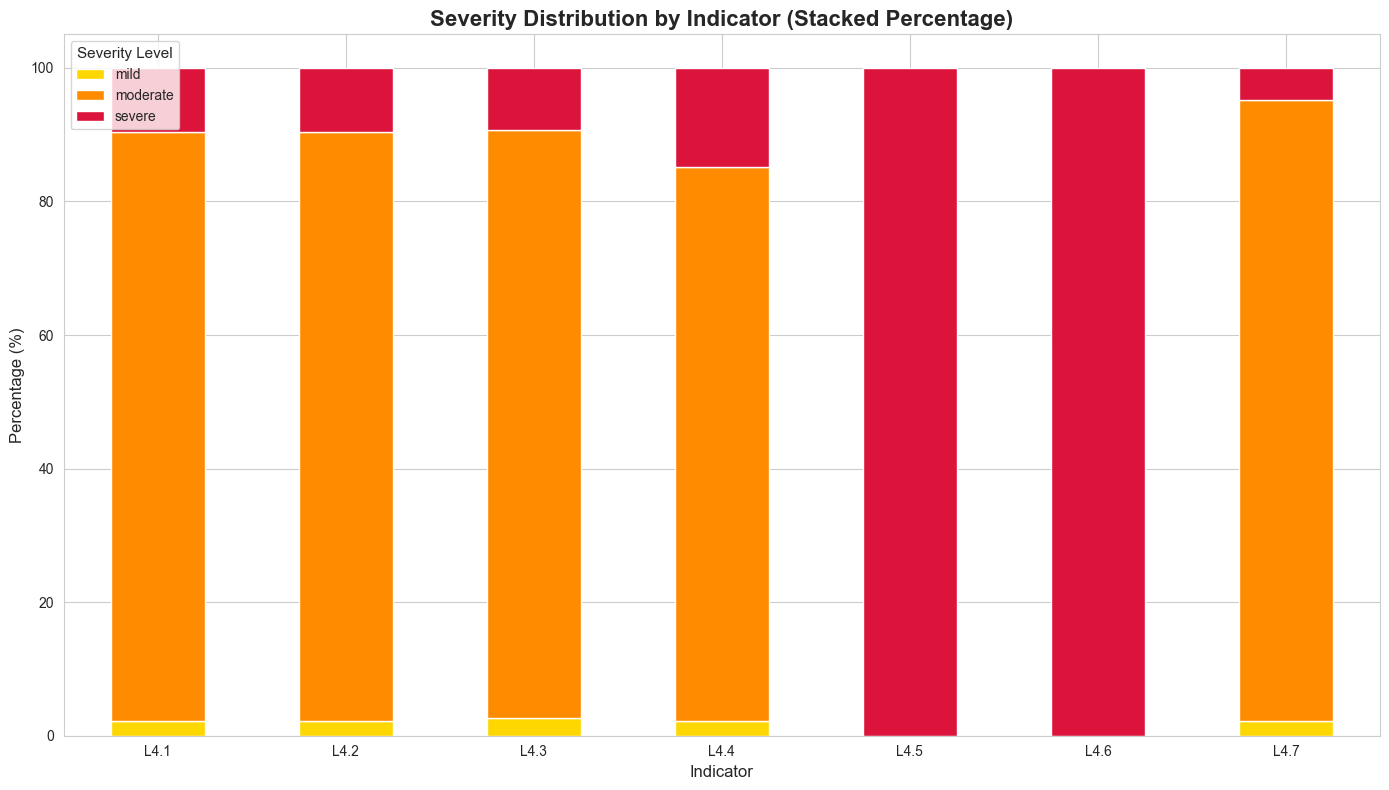

In [43]:
df_pivot_pct = df_pivot.div(df_pivot.sum(axis=1), axis=0) * 100

fig, ax = plt.subplots(figsize=(14, 8))
df_pivot_pct.plot(kind='bar', stacked=True, ax=ax, 
                  color=['#FFD700', '#FF8C00', '#DC143C'])
ax.set_title('Severity Distribution by Indicator (Stacked Percentage)', 
             fontsize=16, fontweight='bold')
ax.set_xlabel('Indicator', fontsize=12)
ax.set_ylabel('Percentage (%)', fontsize=12)
ax.legend(title='Severity Level', title_fontsize=11)
ax.set_xticklabels(df_pivot_pct.index, rotation=0)
plt.tight_layout()
plt.show()


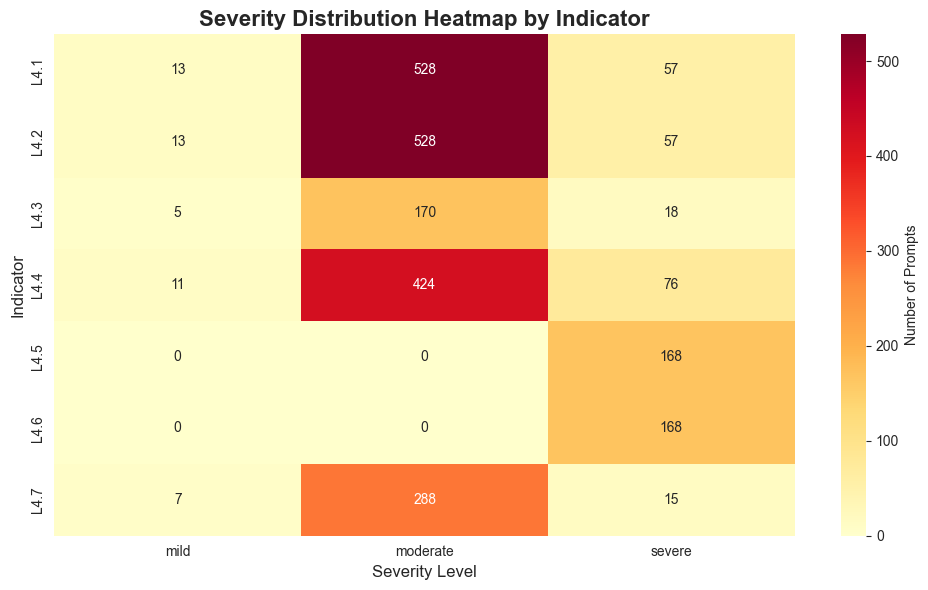

In [44]:
heatmap_data = df_pivot.copy()

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='YlOrRd', 
            cbar_kws={'label': 'Number of Prompts'}, ax=ax)
ax.set_title('Severity Distribution Heatmap by Indicator', 
             fontsize=16, fontweight='bold')
ax.set_xlabel('Severity Level', fontsize=12)
ax.set_ylabel('Indicator', fontsize=12)
plt.tight_layout()
plt.show()


In [45]:
summary_stats = []
for ind in indicators:
    total = sum(indicator_severity[ind].values())
    mild_pct = (indicator_severity[ind]['mild'] / total * 100) if total > 0 else 0
    moderate_pct = (indicator_severity[ind]['moderate'] / total * 100) if total > 0 else 0
    severe_pct = (indicator_severity[ind]['severe'] / total * 100) if total > 0 else 0
    
    summary_stats.append({
        'Indicator': ind,
        'Total Prompts': total,
        'Mild (%)': f"{mild_pct:.2f}",
        'Moderate (%)': f"{moderate_pct:.2f}",
        'Severe (%)': f"{severe_pct:.2f}",
        'Mild Count': indicator_severity[ind]['mild'],
        'Moderate Count': indicator_severity[ind]['moderate'],
        'Severe Count': indicator_severity[ind]['severe']
    })

summary_df = pd.DataFrame(summary_stats)
print("\nSummary Statistics:")
print(summary_df.to_string(index=False))



Summary Statistics:
Indicator  Total Prompts Mild (%) Moderate (%) Severe (%)  Mild Count  Moderate Count  Severe Count
     L4.1            598     2.17        88.29       9.53          13             528            57
     L4.2            598     2.17        88.29       9.53          13             528            57
     L4.3            193     2.59        88.08       9.33           5             170            18
     L4.4            511     2.15        82.97      14.87          11             424            76
     L4.5            168     0.00         0.00     100.00           0               0           168
     L4.6            168     0.00         0.00     100.00           0               0           168
     L4.7            310     2.26        92.90       4.84           7             288            15


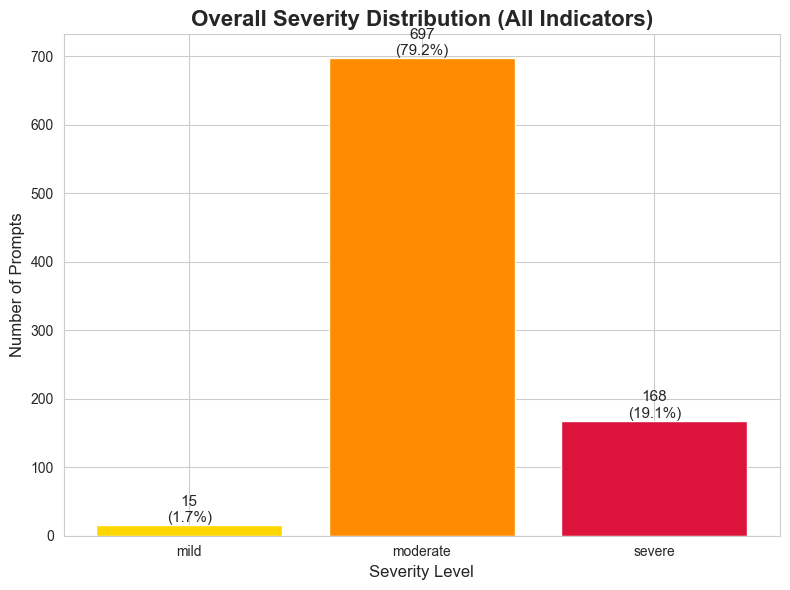


Overall Distribution:
moderate: 697 (79.20%)
mild: 15 (1.70%)
severe: 168 (19.09%)


In [46]:
overall_severity = Counter()
for prompt in prompts:
    intensity = prompt.get('intensity', 'unknown')
    if intensity:
        overall_severity[intensity] += 1

fig, ax = plt.subplots(figsize=(8, 6))
severity_order = ['mild', 'moderate', 'severe']
severities = [s for s in severity_order if s in overall_severity]
counts = [overall_severity[s] for s in severities]
color_map = {'mild': '#FFD700', 'moderate': '#FF8C00', 'severe': '#DC143C'}
colors = [color_map[s] for s in severities]

bars = ax.bar(severities, counts, color=colors)
ax.set_title('Overall Severity Distribution (All Indicators)', 
             fontsize=16, fontweight='bold')
ax.set_xlabel('Severity Level', fontsize=12)
ax.set_ylabel('Number of Prompts', fontsize=12)

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
           f'{int(height)}\n({height/sum(counts)*100:.1f}%)',
           ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

print(f"\nOverall Distribution:")
for sev, count in overall_severity.items():
    pct = count / sum(overall_severity.values()) * 100
    print(f"{sev}: {count} ({pct:.2f}%)")
